## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from IPython.display import JSON
import json
import requests as re

In [46]:
#import data into dataframe
df_train = pd.read_csv('../../../data/preprocessed_data/df_flights_clean.csv')
df_train.head()


fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin dest  \
0  2019-05-10          WN                1912                WN    BWI  FLL   
1  2019-04-27          AA                3666                MQ    JFK  CLE   
2  2018-03-08          WN                 588                WN    ORF  BWI   
3  2018-04-05          AA                1618                AA    PHX  MIA   
4  2018-01-31          UA                4171                EV    CHA  EWR   

   crs_dep_time  dep_time  dep_delay  taxi_out  wheels_off  wheels_on  \
0          1105    1115.0       10.0      13.0      1128.0     1330.0   
1          1545    1548.0        3.0      35.0      1623.0     1743.0   
2          1000    1012.0       12.0       8.0      1020.0     1058.0   
3          1330    1332.0        2.0      11.0      1343.0     2019.0   
4           600     547.0      -13.0      19.0       606.0      745.0   

   taxi_in  crs_arr_time  arr_time  arr_delay  distance  
0      3.0          1345    1333.0      -12.0       925  
1      5.0          1747    1748.0        1.0       425  
2      4.0          1100    1102.0        2.0       159  
3      7.0          2048    2026.0      -22.0      1972  
4     20.0           818     805.0      -13.0       718

In [21]:
#check data types of columns
df_train.dtypes

fl_date                 object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
origin                  object
origin_city_name        object
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
actual_elapsed_time    float64
air_time               float64
distance                 int64
dtype: object

In [22]:
df_train.head()

fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
0  2019-05-10          WN                1912                WN    BWI   
1  2019-04-27          AA                3666                MQ    JFK   
2  2018-03-08          WN                 588                WN    ORF   
3  2018-04-05          AA                1618                AA    PHX   
4  2018-01-31          UA                4171                EV    CHA   

  origin_city_name dest       dest_city_name  crs_dep_time  dep_time  ...  \
0    Baltimore, MD  FLL  Fort Lauderdale, FL          1105    1115.0  ...   
1     New York, NY  CLE        Cleveland, OH          1545    1548.0  ...   
2      Norfolk, VA  BWI        Baltimore, MD          1000    1012.0  ...   
3      Phoenix, AZ  MIA            Miami, FL          1330    1332.0  ...   
4  Chattanooga, TN  EWR           Newark, NJ           600     547.0  ...   

   taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  arr_time  \
0      13.0      1128.0     1330.0      3.0          1345    1333.0   
1      35.0      1623.0     1743.0      5.0          1747    1748.0   
2       8.0      1020.0     1058.0      4.0          1100    1102.0   
3      11.0      1343.0     2019.0      7.0          2048    2026.0   
4      19.0       606.0      745.0     20.0           818     805.0   

   arr_delay  actual_elapsed_time  air_time  distance  
0      -12.0                138.0     122.0       925  
1        1.0                120.0      80.0       425  
2        2.0                 50.0      38.0       159  
3      -22.0                234.0     216.0      1972  
4      -13.0                138.0      99.0       718  

[5 rows x 21 columns]

In [25]:
#split up numerical variables
num_feats = ['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'distance', 'air_time']


df_train[num_feats].describe()

dep_delay       taxi_out        taxi_in      arr_delay  \
count  293922.000000  293922.000000  293922.000000  293922.000000   
mean       10.571155      17.521938       7.651054       5.547431   
std        48.178484      10.018156       6.020398      50.375212   
min      -330.000000       0.000000       0.000000    -160.000000   
25%        -6.000000      11.000000       4.000000     -15.000000   
50%        -2.000000      15.000000       6.000000      -6.000000   
75%         7.000000      20.000000       9.000000       8.000000   
max      2058.000000     163.000000     178.000000    2041.000000   

            distance       air_time  
count  293922.000000  293922.000000  
mean      771.337607     108.044049  
std       586.850668      69.673360  
min        31.000000       7.000000  
25%       342.000000      58.000000  
50%       604.000000      89.000000  
75%      1008.000000     137.000000  
max      5095.000000     681.000000

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [10]:
#importing data
df_flights = pd.read_csv('../../../data/preprocessed_data/df_flights_clean.csv')
df_flights.head(5)

fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
0  2019-05-10          WN                1912                WN    BWI   
1  2019-04-27          AA                3666                MQ    JFK   
2  2018-03-08          WN                 588                WN    ORF   
3  2018-04-05          AA                1618                AA    PHX   
4  2018-01-31          UA                4171                EV    CHA   

  origin_city_name dest       dest_city_name  crs_dep_time  dep_time  \
0    Baltimore, MD  FLL  Fort Lauderdale, FL          1105    1115.0   
1     New York, NY  CLE        Cleveland, OH          1545    1548.0   
2      Norfolk, VA  BWI        Baltimore, MD          1000    1012.0   
3      Phoenix, AZ  MIA            Miami, FL          1330    1332.0   
4  Chattanooga, TN  EWR           Newark, NJ           600     547.0   

   dep_delay  taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  \
0       10.0      13.0      1128.0     1330.0      3.0          1345   
1        3.0      35.0      1623.0     1743.0      5.0          1747   
2       12.0       8.0      1020.0     1058.0      4.0          1100   
3        2.0      11.0      1343.0     2019.0      7.0          2048   
4      -13.0      19.0       606.0      745.0     20.0           818   

   arr_time  arr_delay  distance  
0    1333.0      -12.0       925  
1    1748.0        1.0       425  
2    1102.0        2.0       159  
3    2026.0      -22.0      1972  
4     805.0      -13.0       718

In [11]:
#creating arrival and departure dealy datasets
arr_delay = df_flights.arr_delay
dep_delay = df_flights.dep_delay

In [12]:
dep_delay.describe(), arr_delay.describe()

(count    293922.000000
 mean         10.571155
 std          48.178484
 min        -330.000000
 25%          -6.000000
 50%          -2.000000
 75%           7.000000
 max        2058.000000
 Name: dep_delay, dtype: float64,
 count    293922.000000
 mean          5.547431
 std          50.375212
 min        -160.000000
 25%         -15.000000
 50%          -6.000000
 75%           8.000000
 max        2041.000000
 Name: arr_delay, dtype: float64)

In [13]:
#lower and upper limits
q1_arr_delay = arr_delay.quantile(0.25)
q3_arr_delay = arr_delay.quantile(0.75)
iqr_arr_delay = q3_arr_delay - q1_arr_delay
lower_limit_arr_delay = q1_arr_delay - 1.5 * iqr_arr_delay
upper_limit_arr_delay = q3_arr_delay + 1.5 * iqr_arr_delay

q1_dep_delay = dep_delay.quantile(0.25)
q3_dep_delay = dep_delay.quantile(0.75)
iqr_dep_delay = q3_dep_delay - q1_dep_delay
lower_limit_dep_delay = q1_dep_delay - 1.5 * iqr_dep_delay
upper_limit_dep_delay = q3_dep_delay + 1.5 * iqr_dep_delay

upper_limit_arr_delay, lower_limit_arr_delay, lower_limit_dep_delay, upper_limit_dep_delay 

(42.5, -49.5, -25.5, 26.5)

In [14]:
#dispay all ouliers for the arrival delay
df_flights[(df_flights.arr_delay<lower_limit_arr_delay) | (df_flights.arr_delay>upper_limit_arr_delay)]


fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
10      2019-01-31          B6                1459                B6    BDL   
11      2019-06-19          UA                4634                AX    SGF   
17      2019-01-31          AS                3372                OO    STS   
25      2019-06-18          DL                1585                DL    LGA   
27      2019-02-17          B6                1336                B6    DTW   
...            ...         ...                 ...               ...    ...   
293883  2018-10-13          AA                3821                MQ    ORD   
293891  2019-01-14          DL                2777                DL    SFO   
293901  2018-12-03          AA                3283                OO    ORD   
293911  2019-03-09          AA                2506                AA    ORD   
293920  2018-11-24          DL                5987                YX    CMH   

         origin_city_name dest       dest_city_name  crs_dep_time  dep_time  \
10           Hartford, CT  FLL  Fort Lauderdale, FL          2000    2045.0   
11        Springfield, MO  ORD          Chicago, IL           826    1013.0   
17         Santa Rosa, CA  LAX      Los Angeles, CA          1720    1752.0   
25           New York, NY  MCO          Orlando, FL          1830    2319.0   
27            Detroit, MI  BOS           Boston, MA          1836    1912.0   
...                   ...  ...                  ...           ...       ...   
293883        Chicago, IL  ALB           Albany, NY          1245    1403.0   
293891  San Francisco, CA  LAX      Los Angeles, CA           725     824.0   
293901        Chicago, IL  CVG       Cincinnati, OH          1655    1810.0   
293911        Chicago, IL  PHL     Philadelphia, PA          2205    2314.0   
293920       Columbus, OH  BOS           Boston, MA           601     714.0   

        dep_delay  taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  \
10           45.0      18.0      2103.0     2351.0      7.0          2307   
11          107.0      10.0      1023.0     1127.0      6.0          1010   
17           32.0      50.0      1842.0     1938.0     13.0          1900   
25          289.0      19.0      2338.0      200.0      6.0          2121   
27           36.0      53.0      2005.0     2114.0     17.0          2025   
...           ...       ...         ...        ...      ...           ...   
293883       78.0      17.0      1420.0     1643.0      3.0          1542   
293891       59.0      22.0       846.0     1009.0      5.0           902   
293901       75.0      48.0      1858.0     2047.0      7.0          1909   
293911       69.0      14.0      2328.0      153.0      5.0           101   
293920       73.0       9.0       723.0      853.0      6.0           805   

        arr_time  arr_delay  distance  
10        2358.0       51.0      1173  
11        1133.0       83.0       438  
17        1951.0       51.0       400  
25         206.0      285.0       950  
27        2131.0       66.0       632  
...          ...        ...       ...  
293883    1646.0       64.0       723  
293891    1014.0       72.0       337  
293901    2054.0      105.0       264  
293911     158.0       57.0       678  
293920     859.0       54.0       640  

[27352 rows x 19 columns]

In [15]:
#dispay all ouliers for the departure delay
df_flights[(df_flights.dep_delay<lower_limit_dep_delay) | (df_flights.dep_delay>upper_limit_dep_delay)]

fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
10      2019-01-31          B6                1459                B6    BDL   
11      2019-06-19          UA                4634                AX    SGF   
17      2019-01-31          AS                3372                OO    STS   
25      2019-06-18          DL                1585                DL    LGA   
27      2019-02-17          B6                1336                B6    DTW   
...            ...         ...                 ...               ...    ...   
293891  2019-01-14          DL                2777                DL    SFO   
293898  2019-02-17          WN                3507                WN    LAS   
293901  2018-12-03          AA                3283                OO    ORD   
293911  2019-03-09          AA                2506                AA    ORD   
293920  2018-11-24          DL                5987                YX    CMH   

         origin_city_name dest       dest_city_name  crs_dep_time  dep_time  \
10           Hartford, CT  FLL  Fort Lauderdale, FL          2000    2045.0   
11        Springfield, MO  ORD          Chicago, IL           826    1013.0   
17         Santa Rosa, CA  LAX      Los Angeles, CA          1720    1752.0   
25           New York, NY  MCO          Orlando, FL          1830    2319.0   
27            Detroit, MI  BOS           Boston, MA          1836    1912.0   
...                   ...  ...                  ...           ...       ...   
293891  San Francisco, CA  LAX      Los Angeles, CA           725     824.0   
293898      Las Vegas, NV  DEN           Denver, CO          1635    1703.0   
293901        Chicago, IL  CVG       Cincinnati, OH          1655    1810.0   
293911        Chicago, IL  PHL     Philadelphia, PA          2205    2314.0   
293920       Columbus, OH  BOS           Boston, MA           601     714.0   

        dep_delay  taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  \
10           45.0      18.0      2103.0     2351.0      7.0          2307   
11          107.0      10.0      1023.0     1127.0      6.0          1010   
17           32.0      50.0      1842.0     1938.0     13.0          1900   
25          289.0      19.0      2338.0      200.0      6.0          2121   
27           36.0      53.0      2005.0     2114.0     17.0          2025   
...           ...       ...         ...        ...      ...           ...   
293891       59.0      22.0       846.0     1009.0      5.0           902   
293898       28.0      29.0      1732.0     1951.0      7.0          1920   
293901       75.0      48.0      1858.0     2047.0      7.0          1909   
293911       69.0      14.0      2328.0      153.0      5.0           101   
293920       73.0       9.0       723.0      853.0      6.0           805   

        arr_time  arr_delay  distance  
10        2358.0       51.0      1173  
11        1133.0       83.0       438  
17        1951.0       51.0       400  
25         206.0      285.0       950  
27        2131.0       66.0       632  
...          ...        ...       ...  
293891    1014.0       72.0       337  
293898    1958.0       38.0       628  
293901    2054.0      105.0       264  
293911     158.0       57.0       678  
293920     859.0       54.0       640  

[38892 rows x 19 columns]

In [16]:
#remove arrival delays ouliers
df_flights_no_outliers = df_flights[(df_flights.arr_delay>lower_limit_arr_delay) & (df_flights.arr_delay<upper_limit_arr_delay)]

In [17]:
#remove arrival arrival ouliers
df_flights_no_outliers = df_flights_no_outliers[(df_flights_no_outliers.dep_delay>lower_limit_dep_delay) & (df_flights_no_outliers.dep_delay<upper_limit_dep_delay)]
df_flights_no_outliers

fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
0       2019-05-10          WN                1912                WN    BWI   
1       2019-04-27          AA                3666                MQ    JFK   
2       2018-03-08          WN                 588                WN    ORF   
3       2018-04-05          AA                1618                AA    PHX   
4       2018-01-31          UA                4171                EV    CHA   
...            ...         ...                 ...               ...    ...   
293916  2018-02-25          AA                3709                MQ    ORD   
293917  2018-04-13          AA                3678                MQ    TLH   
293918  2018-10-06          DL                3674                OO    SLC   
293919  2018-12-13          DL                 892                DL    ATL   
293921  2018-09-13          WN                4735                WN    ATL   

          origin_city_name dest       dest_city_name  crs_dep_time  dep_time  \
0            Baltimore, MD  FLL  Fort Lauderdale, FL          1105    1115.0   
1             New York, NY  CLE        Cleveland, OH          1545    1548.0   
2              Norfolk, VA  BWI        Baltimore, MD          1000    1012.0   
3              Phoenix, AZ  MIA            Miami, FL          1330    1332.0   
4          Chattanooga, TN  EWR           Newark, NJ           600     547.0   
...                    ...  ...                  ...           ...       ...   
293916         Chicago, IL  GRB        Green Bay, WI          1319    1312.0   
293917     Tallahassee, FL  MIA            Miami, FL           605     603.0   
293918  Salt Lake City, UT  BZN          Bozeman, MT          1105    1101.0   
293919         Atlanta, GA  LEX        Lexington, KY          1814    1815.0   
293921         Atlanta, GA  LAS        Las Vegas, NV          1335    1336.0   

        dep_delay  taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  \
0            10.0      13.0      1128.0     1330.0      3.0          1345   
1             3.0      35.0      1623.0     1743.0      5.0          1747   
2            12.0       8.0      1020.0     1058.0      4.0          1100   
3             2.0      11.0      1343.0     2019.0      7.0          2048   
4           -13.0      19.0       606.0      745.0     20.0           818   
...           ...       ...         ...        ...      ...           ...   
293916       -7.0       9.0      1321.0     1355.0      2.0          1414   
293917       -2.0      12.0       615.0      717.0      6.0           731   
293918       -4.0      15.0      1116.0     1208.0      7.0          1230   
293919        1.0      20.0      1835.0     1921.0      5.0          1927   
293921        1.0      12.0      1348.0     1427.0     10.0          1450   

        arr_time  arr_delay  distance  
0         1333.0      -12.0       925  
1         1748.0        1.0       425  
2         1102.0        2.0       159  
3         2026.0      -22.0      1972  
4          805.0      -13.0       718  
...          ...        ...       ...  
293916    1357.0      -17.0       173  
293917     723.0       -8.0       402  
293918    1215.0      -15.0       347  
293919    1926.0       -1.0       304  
293921    1437.0      -13.0      1747  

[252627 rows x 19 columns]

In [18]:
arr_delay = df_flights_no_outliers.arr_delay
dep_delay = df_flights_no_outliers.dep_delay

C:\Users\pavel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pavel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


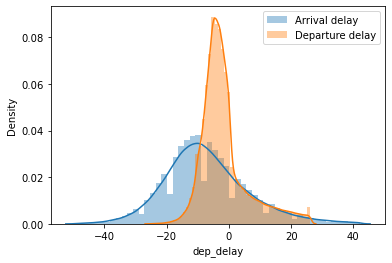

In [19]:
# Check distribution
g = sns.distplot(arr_delay, kde=True, rug=False,label='Arrival delay')
g2 = sns.distplot(dep_delay, kde=True, rug=False, label='Departure delay')
plt.legend()

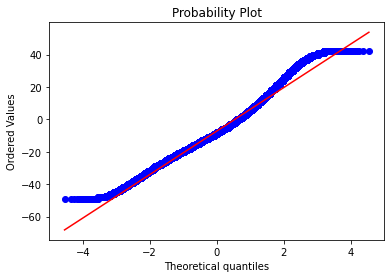

In [23]:
stats.probplot(arr_delay, dist="norm", plot=plt)
plt.show()

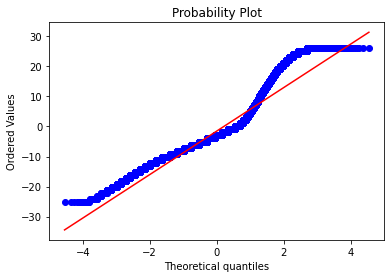

In [26]:
stats.probplot(dep_delay, dist="norm", plot=plt)
plt.show()

In [30]:
# Shapiro-Wilk Normality Test
stat, p = shapiro(arr_delay)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.982, p=0.000
Probably not Gaussian


C:\Users\pavel\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
print('P value is smaller than alpha, which means that we reject the null hypothesis')

P value is smaller than alpha, which means that we reject the null hypothesis


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [32]:
date_split = df_flights_no_outliers['fl_date'].str.split('-')
date_split[:3]
df_flights_no_outliers['year'] = [x[0] for x in date_split]
df_flights_no_outliers['month'] = [x[1] for x in date_split]
df_flights_no_outliers['day'] = [x[2] for x in date_split]

<AxesSubplot:ylabel='Density'>

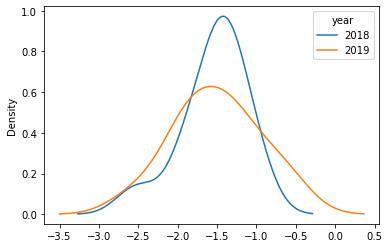

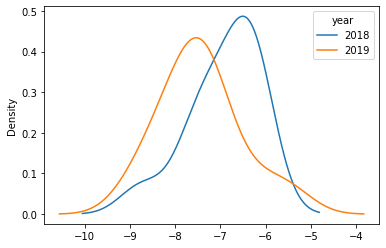

In [33]:
df_flights_no_outliers.groupby(['year','month'])['dep_delay'].mean().unstack('year').plot.kde()
df_flights_no_outliers.groupby(['year','month'])['arr_delay'].mean().unstack('year').plot.kde()


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [35]:
weather_df_flights_no_outliers = df_flights_no_outliers.sample(n=200)
weather_df_flights_no_outliers['weather_types'] = ''

In [36]:
#select random sample of 200 records
weather_df_flights_no_outliers.sample(n=200)
weather_df_flights_no_outliers

fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
182632  2019-06-26          DL                1822                DL    MSY   
163169  2018-08-11          WN                5754                WN    MDW   
286670  2018-07-07          DL                1707                DL    TVC   
250092  2019-12-08          UA                5849                OO    SMF   
269513  2018-04-17          UA                1816                UA    ORD   
...            ...         ...                 ...               ...    ...   
160217  2019-04-18          AA                3055                OO    PSP   
215494  2018-03-18          AA                2968                OO    BUF   
264246  2018-07-28          B6                  89                B6    JFK   
75094   2018-01-23          AA                 159                AA    SFO   
227066  2018-03-23          DL                7381                OO    SLC   

          origin_city_name dest         dest_city_name  crs_dep_time  \
182632     New Orleans, LA  LAX        Los Angeles, CA          1859   
163169         Chicago, IL  HOU            Houston, TX          1040   
286670   Traverse City, MI  DTW            Detroit, MI           635   
250092      Sacramento, CA  DEN             Denver, CO          1815   
269513         Chicago, IL  EWR             Newark, NJ          2134   
...                    ...  ...                    ...           ...   
160217    Palm Springs, CA  PHX            Phoenix, AZ          1823   
215494         Buffalo, NY  ORD            Chicago, IL          1822   
264246        New York, NY  SAN          San Diego, CA          1619   
75094    San Francisco, CA  DFW  Dallas/Fort Worth, TX          1004   
227066  Salt Lake City, UT  TWF         Twin Falls, ID          1345   

        dep_time  ...  wheels_on  taxi_in  crs_arr_time  arr_time  arr_delay  \
182632    1900.0  ...     2100.0      9.0          2055    2109.0       14.0   
163169    1043.0  ...     1254.0      7.0          1315    1301.0      -14.0   
286670     636.0  ...      730.0      9.0           738     739.0        1.0   
250092    1805.0  ...     2120.0     33.0          2142    2153.0       11.0   
269513    2133.0  ...       22.0      6.0            36      28.0       -8.0   
...          ...  ...        ...      ...           ...       ...        ...   
160217    1813.0  ...     1910.0     14.0          1937    1924.0      -13.0   
215494    1810.0  ...     1849.0     21.0          1930    1910.0      -20.0   
264246    1627.0  ...     1947.0      4.0          1933    1951.0       18.0   
75094     1002.0  ...     1510.0     12.0          1530    1522.0       -8.0   
227066    1342.0  ...     1427.0      3.0          1437    1430.0       -7.0   

        distance  year  month  day weather_types  
182632      1670  2019     06   26                
163169       937  2018     08   11                
286670       207  2018     07   07                
250092       909  2019     12   08                
269513       719  2018     04   17                
...          ...   ...    ...  ...           ...  
160217       261  2019     04   18                
215494       474  2018     03   18                
264246      2446  2018     07   28                
75094       1464  2018     01   23                
227066       175  2018     03   23                

[200 rows x 23 columns]

In [37]:
# connect to the API and get weather data for a particular city from startdate to enddate
#https://www.weatherapi.com/docs/  --History API
def get_weather(df):
    for x in range(200):       
        params = {'q': df.iloc[x].dest_city_name,
                  'date': df.iloc[x].fl_date,
                  'format': 'json',
                  'tp': 1, 
                  'key': '91a627fcac5948e2815230603221301'
                 }
        url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'
        
        response = re.get(url=url, params=params)
        json_data = response.json()
        temp = pd.json_normalize(json_data)
        df['weather_types'].iloc[x] = temp.iloc[0]['data.weather'][0]['hourly'][0]['weatherDesc'][0]['value']
    return df


In [38]:
get_weather(weather_df_flights_no_outliers)

C:\Users\pavel\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
182632  2019-06-26          DL                1822                DL    MSY   
163169  2018-08-11          WN                5754                WN    MDW   
286670  2018-07-07          DL                1707                DL    TVC   
250092  2019-12-08          UA                5849                OO    SMF   
269513  2018-04-17          UA                1816                UA    ORD   
...            ...         ...                 ...               ...    ...   
160217  2019-04-18          AA                3055                OO    PSP   
215494  2018-03-18          AA                2968                OO    BUF   
264246  2018-07-28          B6                  89                B6    JFK   
75094   2018-01-23          AA                 159                AA    SFO   
227066  2018-03-23          DL                7381                OO    SLC   

          origin_city_name dest         dest_city_name  crs_dep_time  \
182632     New Orleans, LA  LAX        Los Angeles, CA          1859   
163169         Chicago, IL  HOU            Houston, TX          1040   
286670   Traverse City, MI  DTW            Detroit, MI           635   
250092      Sacramento, CA  DEN             Denver, CO          1815   
269513         Chicago, IL  EWR             Newark, NJ          2134   
...                    ...  ...                    ...           ...   
160217    Palm Springs, CA  PHX            Phoenix, AZ          1823   
215494         Buffalo, NY  ORD            Chicago, IL          1822   
264246        New York, NY  SAN          San Diego, CA          1619   
75094    San Francisco, CA  DFW  Dallas/Fort Worth, TX          1004   
227066  Salt Lake City, UT  TWF         Twin Falls, ID          1345   

        dep_time  ...  wheels_on  taxi_in  crs_arr_time  arr_time  arr_delay  \
182632    1900.0  ...     2100.0      9.0          2055    2109.0       14.0   
163169    1043.0  ...     1254.0      7.0          1315    1301.0      -14.0   
286670     636.0  ...      730.0      9.0           738     739.0        1.0   
250092    1805.0  ...     2120.0     33.0          2142    2153.0       11.0   
269513    2133.0  ...       22.0      6.0            36      28.0       -8.0   
...          ...  ...        ...      ...           ...       ...        ...   
160217    1813.0  ...     1910.0     14.0          1937    1924.0      -13.0   
215494    1810.0  ...     1849.0     21.0          1930    1910.0      -20.0   
264246    1627.0  ...     1947.0      4.0          1933    1951.0       18.0   
75094     1002.0  ...     1510.0     12.0          1530    1522.0       -8.0   
227066    1342.0  ...     1427.0      3.0          1437    1430.0       -7.0   

        distance  year  month  day         weather_types  
182632      1670  2019     06   26                Cloudy  
163169       937  2018     08   11  Patchy rain possible  
286670       207  2018     07   07                 Clear  
250092       909  2019     12   08                 Clear  
269513       719  2018     04   17         Partly cloudy  
...          ...   ...    ...  ...                   ...  
160217       261  2019     04   18                 Clear  
215494       474  2018     03   18                 Clear  
264246      2446  2018     07   28                 Clear  
75094       1464  2018     01   23                 Clear  
227066       175  2018     03   23         Partly cloudy  

[200 rows x 23 columns]

In [39]:
# extra copy of retreaved dataset
temp = weather_df_flights_no_outliers
#weather_df_flights_no_outliers = temp

In [40]:
weather_df_flights_no_outliers.weather_types.isnull().any()

False

In [41]:
weather_df_flights_no_outliers.weather_types.value_counts()

Clear                            106
Partly cloudy                     35
Overcast                          13
Patchy rain possible               9
Cloudy                             8
Light rain shower                  5
Mist                               5
Moderate or heavy rain shower      3
Patchy light snow                  3
Light rain                         2
Thundery outbreaks possible        2
Torrential rain shower             2
Light drizzle                      1
Patchy light drizzle               1
Patchy light rain                  1
Light snow                         1
Heavy snow                         1
Moderate rain at times             1
Patchy heavy snow                  1
Name: weather_types, dtype: int64

In [42]:
#create list and sort accorning to the weather type we required
weather_dict= {
    'Clear':'sunny',
    'Partly cloudy':'cloudy',
    'Overcast': 'cloudy',
    'Patchy rain possible':'rainy',
    'Cloudy': 'cloudy',
    'Light rain shower':'rainy',
    'Mist':'rainy',
    'Moderate or heavy rain shower':'rainy',
    'Patchy light snow': 'snow',
    'Light rain': 'rainy',
    'Thundery outbreaks possible': 'rainy',
    'Torrential rain shower': 'rainy',
    'Light drizzle': 'rainy',
    'Patchy light drizzle': 'rainy',
    'Patchy light rain': 'rainy',
    'Light snow': 'snow',
    'Heavy snow': 'snow',
    'Moderate rain at times': 'rainy',
    'Patchy heavy snow': 'snow'
}
weather_df_flights_no_outliers.weather_types = weather_df_flights_no_outliers.weather_types.map(weather_dict)
weather_df_flights_no_outliers.weather_types.value_counts()

sunny     106
cloudy     56
rainy      32
snow        6
Name: weather_types, dtype: int64

<AxesSubplot:xlabel='dep_delay', ylabel='weather_types'>

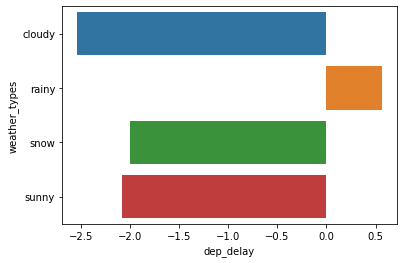

In [43]:
group = weather_df_flights_no_outliers.groupby('weather_types',as_index=False).mean()
sns.barplot(x = 'dep_delay', y = 'weather_types', data = group )

C:\Users\pavel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pavel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pavel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

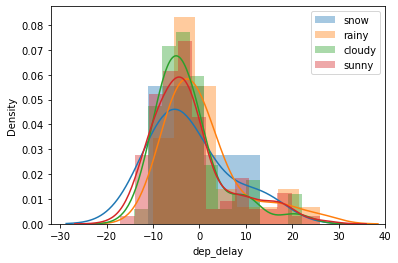

In [44]:
cond = ['snow','rainy','cloudy','sunny']
for x in cond:
    sns.distplot( weather_df_flights_no_outliers[weather_df_flights_no_outliers.weather_types == x].dep_delay , label=x)
plt.xlim(None,40)
plt.legend()

In [45]:
rainy = weather_df_flights_no_outliers[weather_df_flights_no_outliers.weather_types =='rainy'].dep_delay
sunny = weather_df_flights_no_outliers[weather_df_flights_no_outliers.weather_types =='sunny'].dep_delay
snow = weather_df_flights_no_outliers[weather_df_flights_no_outliers.weather_types =='snow'].dep_delay
cloudy = weather_df_flights_no_outliers[weather_df_flights_no_outliers.weather_types =='cloudy'].dep_delay

In [46]:
from scipy import stats
print(stats.ks_2samp(rainy,sunny))
print(stats.ks_2samp(rainy,snow))
print(stats.ks_2samp(rainy,cloudy))

KstestResult(statistic=0.22110849056603774, pvalue=0.15236422515926162)
KstestResult(statistic=0.3854166666666667, pvalue=0.34539593672720603)
KstestResult(statistic=0.21875, pvalue=0.2470235707320445)


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [24]:
# convert numerical into categorical data

In [25]:
# create hour variable by using floor division
# when dep_time_hour = 0, 0 <= dep_time <= 60
df_train['dep_time_hour'] = df_train.dep_time//100


NameError: name 'df_train' is not defined

In [ ]:
#create column that separates into different day time categories
# bin 1 = late night, bin 2 = morning, bin 3 = afternoon, bin 4 = evening 
bins = [-1, 599, 1199, 1700, 2400]
df_train['dep_time_cat'] = np.searchsorted(bins, df_train['dep_time'].values)
df_train.head()

fl_date mkt_carrier  mkt_carrier_fl_num op_unique_carrier origin  \
0  2019-05-10          WN                1912                WN    BWI   
1  2019-04-27          AA                3666                MQ    JFK   
2  2018-03-08          WN                 588                WN    ORF   
3  2018-04-05          AA                1618                AA    PHX   
4  2018-01-31          UA                4171                EV    CHA   

  origin_city_name dest       dest_city_name  crs_dep_time  dep_time  ...  \
0    Baltimore, MD  FLL  Fort Lauderdale, FL          1105    1115.0  ...   
1     New York, NY  CLE        Cleveland, OH          1545    1548.0  ...   
2      Norfolk, VA  BWI        Baltimore, MD          1000    1012.0  ...   
3      Phoenix, AZ  MIA            Miami, FL          1330    1332.0  ...   
4  Chattanooga, TN  EWR           Newark, NJ           600     547.0  ...   

   wheels_on  taxi_in  crs_arr_time  arr_time  arr_delay  actual_elapsed_time  \
0     1330.0      3.0          1345    1333.0      -12.0                138.0   
1     1743.0      5.0          1747    1748.0        1.0                120.0   
2     1058.0      4.0          1100    1102.0        2.0                 50.0   
3     2019.0      7.0          2048    2026.0      -22.0                234.0   
4      745.0     20.0           818     805.0      -13.0                138.0   

   air_time  distance  dep_time_hour  dep_time_cat  
0     122.0       925           11.0             2  
1      80.0       425           15.0             3  
2      38.0       159           10.0             2  
3     216.0      1972           13.0             3  
4      99.0       718            5.0             1  

[5 rows x 23 columns]

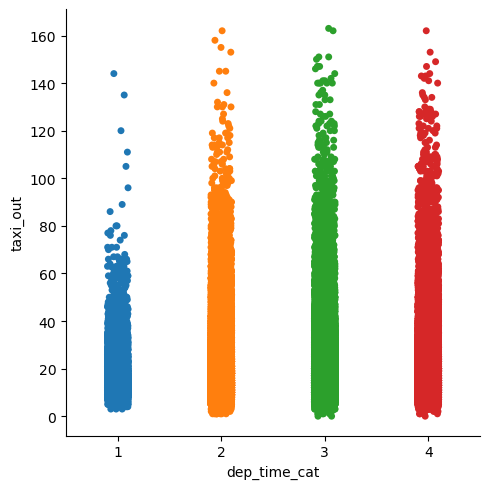

In [ ]:
#plot catplot to view rough distribution
sns.catplot(x="dep_time_cat", y="taxi_out", data=df_train)
plt.show()

In [ ]:
# Compare means of taxi_out times for each time of day

late_night = df_train[df_train['dep_time_cat'] == 1].mean()['taxi_out']
morning = df_train[df_train['dep_time_cat'] == 2].mean()['taxi_out']
afternoon = df_train[df_train['dep_time_cat'] == 3].mean()['taxi_out']
evening = df_train[df_train['dep_time_cat'] == 4].mean()['taxi_out']

print(f'Mean taxi_out times for late night : {late_night}')
print(f'Mean taxi_out times for morning : {morning}')
print(f'Mean taxi_out times for afternoon : {afternoon}')
print(f'Mean taxi_out times for evening : {evening}')

<ipython-input-43-4f4cd4daf8c4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  late_night = df_train[df_train['dep_time_cat'] == 1].mean()['taxi_out']
<ipython-input-43-4f4cd4daf8c4>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  morning = df_train[df_train['dep_time_cat'] == 2].mean()['taxi_out']
<ipython-input-43-4f4cd4daf8c4>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  afternoon = df_train[df_train['dep_time_cat'] == 3].mean()['taxi_out']


Mean taxi_out times for late night : 15.798816984719386
Mean taxi_out times for morning : 17.896083453639456
Mean taxi_out times for afternoon : 17.058913738019168
Mean taxi_out times for evening : 17.801891494071697


<ipython-input-43-4f4cd4daf8c4>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  evening = df_train[df_train['dep_time_cat'] == 4].mean()['taxi_out']


In [ ]:
# mean taxi_out times are lower in the late night compared to other times of the day
# mean taxi_out times are highest in the morning

In [ ]:
#view count for each departure time category
df_train['dep_time_cat'].value_counts()

2    107365
4     86281
3     86075
1     14201
Name: dep_time_cat, dtype: int64

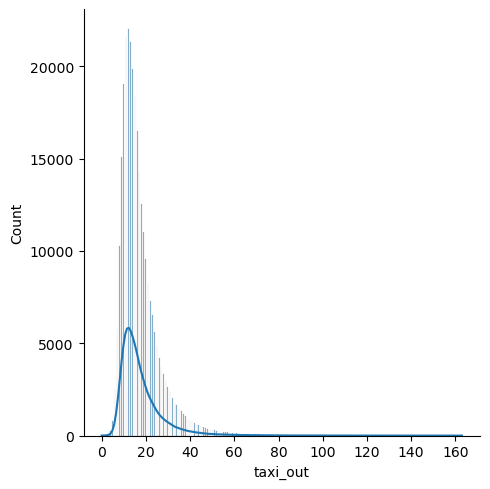

In [ ]:
#Plot histogram of taxi_out to view distribution
sns.displot(df_train['taxi_out'], kde=True, legend = True)
plt.show()

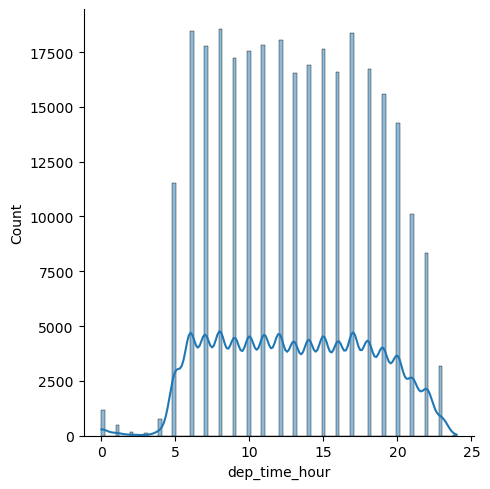

In [ ]:
#Plot histogram of dep_time to view distribution
sns.displot(df_train['dep_time_hour'], kde=True)
plt.show()

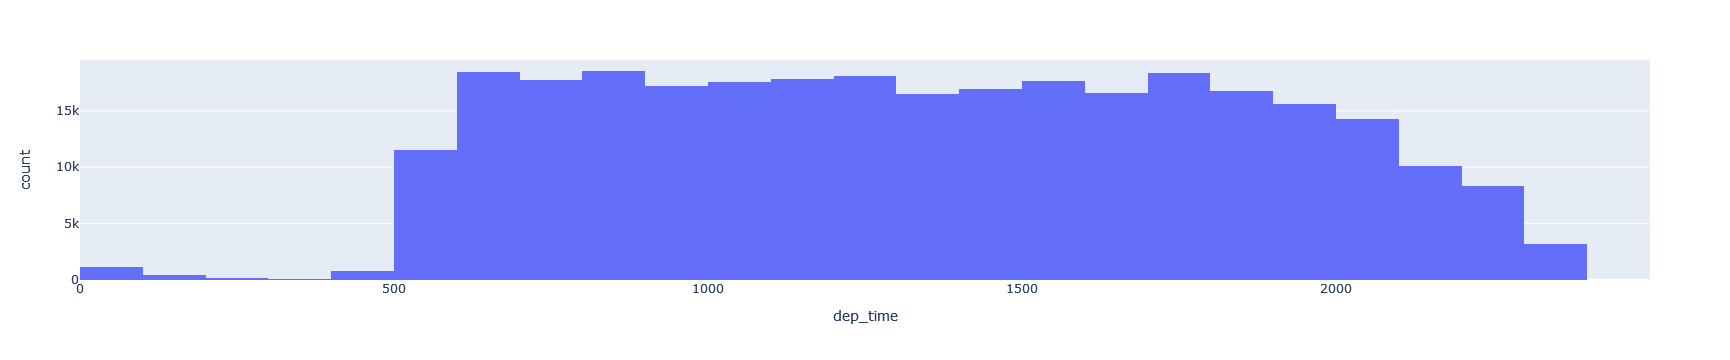

In [ ]:
# plot histogram with 24 bins 
fig = px.histogram(df_train, x="dep_time", nbins=24)
fig.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

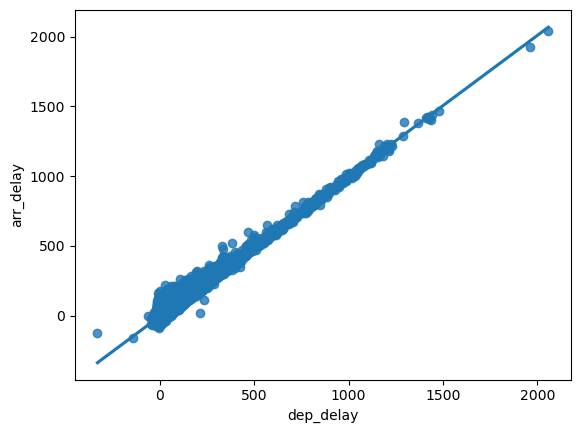

In [ ]:
#regression plot for dep_delay and arr_delay
sns.regplot(data=df_train, x="dep_delay", y="arr_delay")
plt.show()

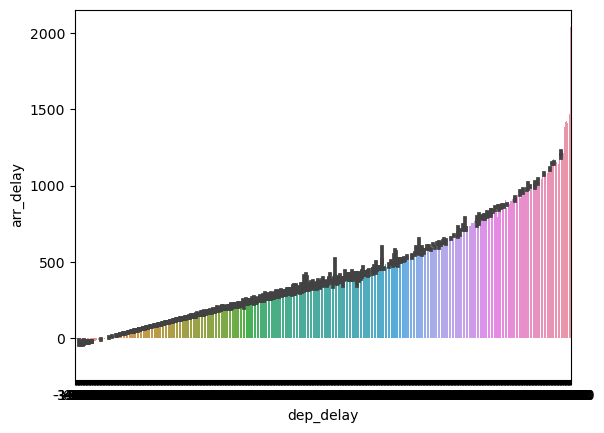

In [ ]:
#create barplot for dep_delay and arr_delay
ax = sns.barplot(data=df_train, x="dep_delay", y="arr_delay")
plt.show()

In [ ]:
# Scaling

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats]))
df_train_scaled.columns = num_feats

In [ ]:
df_train_scaled.head()

dep_delay  taxi_out   taxi_in  arr_delay  distance
0  -0.011855 -0.451375 -0.772551  -0.348335  0.261843
1  -0.157148  1.744642 -0.440346  -0.090271 -0.590164
2   0.029657 -0.950470 -0.606448  -0.070420 -1.043432
3  -0.177905 -0.651013 -0.108141  -0.546846  2.045945
4  -0.489247  0.147539  2.051188  -0.368186 -0.090888

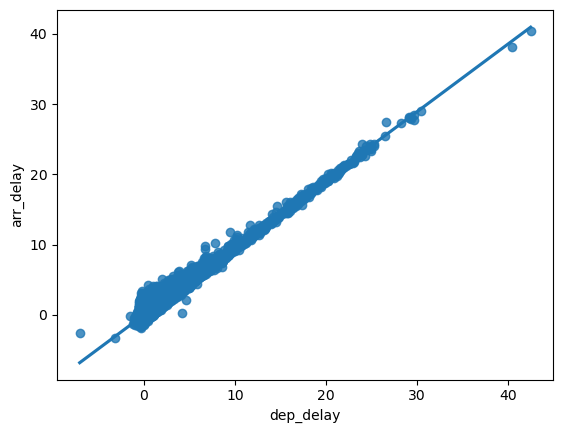

In [ ]:
#regression plot for dep_delay and arr_delay scaled
sns.regplot(data=df_train_scaled, x="dep_delay", y="arr_delay")
plt.show()

In [ ]:
#set target variable as y and drop target column from dataframe
y = df_train_scaled.arr_delay
df_train_scaled.drop("arr_delay",axis=1, inplace=True)

In [ ]:
#Forward Regression
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=4)
X = skb.fit_transform(df_train_scaled, y)


In [ ]:
# This will give us the position of top columns
skb.get_support()
# column names
df_train_scaled.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_train_scaled.columns[skb.get_support()])

In [ ]:
#Perform Linear Regresion on data
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)

# print out regression summary statistics
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.776e+06
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:06:12   Log-Likelihood:                 57026.
No. Observations:              293922   AIC:                        -1.140e+05
Df Residuals:                  293917   BIC:                        -1.140e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.602e-16      0.000   4.36e-13      1.0

In [ ]:
# R-Squared is 0.96 therefore, departure delay is highly linearly correlated to arrival delay.
# In addition, the co-efficient weight is 0.9528 which means that the importance of departure delay is highly valued
# p-value is also < 0.05 so the result is statistically significant

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)

In [ ]:
regressor.score(X,y)

0.9602805126138969

#### **Task 6**: How many states cover 50% of US air traffic? 

In [51]:
#drop unnessary columns, leaving fl_date, origin_city_name, dest_city_name
temp = pd.read_csv('df_flights_clean.csv')
to_drop = ['fl_date','dest_city_name','mkt_carrier','mkt_carrier_fl_num','op_unique_carrier','origin','dest', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'distance', 'actual_elapsed_time', 'air_time']
temp.drop( to_drop, axis = 1, inplace=True)

In [52]:
temp.head(5)

origin_city_name
0    Baltimore, MD
1     New York, NY
2      Norfolk, VA
3      Phoenix, AZ
4  Chattanooga, TN

In [59]:
# split origin column and add new columns to df
temp[['origin_city','origin_state']] = temp.origin_city_name.str.split(',', expand=True)

In [60]:
#drop useless colums
drop_col = ['origin_city_name', 'origin_city']
temp.drop(drop_col, axis = 1, inplace = True)

In [62]:
flights_count = temp.origin_state.value_counts()

In [64]:
flights_count.head(5)

 CA    32554
 TX    29014
 FL    21310
 IL    18394
 GA    15628
Name: origin_state, dtype: int64

In [66]:
flights_sum=flights_count.sum()
flights_sum

293922

In [69]:
percent = flights_count * 100 /flights_sum
percent.head(5)

 CA    11.075728
 TX     9.871326
 FL     7.250223
 IL     6.258123
 GA     5.317057
Name: origin_state, dtype: float64

In [70]:
half = percent.head(26)
half

 CA    11.075728
 TX     9.871326
 FL     7.250223
 IL     6.258123
 GA     5.317057
 NY     5.034329
 NC     4.621294
 CO     3.940841
 PA     2.979702
 DC     2.977661
 WA     2.871850
 MI     2.838168
 AZ     2.651043
 NV     2.407782
 OH     2.259783
 MN     2.210450
 NJ     2.045441
 MA     1.923980
 MO     1.845047
 TN     1.734134
 UT     1.594641
 HI     1.492913
 OR     1.404794
 MD     1.402753
 LA     1.027483
 VA     0.978831
Name: origin_state, dtype: float64

In [105]:
#convert series to datafame
half2 = pd.DataFrame(half)
half2.reset_index(inplace = True)
half2.rename(columns = {'index':'state', 'origin_state' :'percentage'}, inplace = True)
half2.head(5)

state  percentage
0    CA   11.075728
1    TX    9.871326
2    FL    7.250223
3    IL    6.258123
4    GA    5.317057

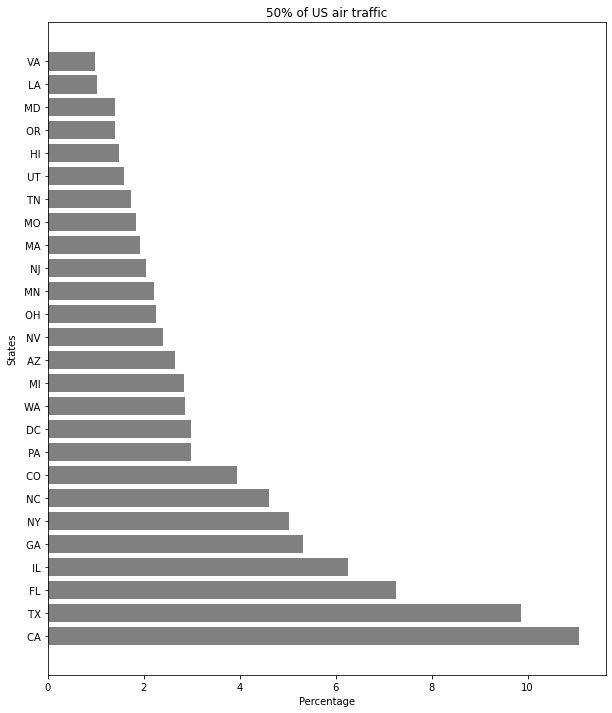

In [110]:
#plot the bar chart
plt.barh(half2.state,half2.percentage,  color='gray')
plt.ylabel("States")
plt.xlabel("Percentage")
plt.title("50% of US air traffic")
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [56]:
#import data into dataframe
df_fuel = pd.read_csv('../../../data/preprocessed_data/df_fuel_clean.csv')
df_fuel.head()


month  airline_id carrier  \
0      8     20287.0      WP   
1      2     20310.0      WL   
2     10     20436.0      F9   
3      3     20422.0      SY   
4      2     20436.0      F9   

                                        carrier_name  total_gallons  \
0                                  Island Air Hawaii        97531.0   
1  Caribbean Sun Airlines, Inc. d/b/a World Atlan...        61164.0   
2                             Frontier Airlines Inc.     16936487.0   
3             Sun Country Airlines d/b/a MN Airlines      7433108.0   
4                             Frontier Airlines Inc.     15240623.0   

   total_cost  year  
0      173454  2015  
1      253856  2018  
2    24008936  2015  
3    18341680  2019  
4    14937147  2016

In [57]:
#use groupby method to find sum of total_gallons per carrier
total_fuel = df_fuel.groupby(['carrier_name'])['total_gallons'].sum()

In [58]:
#convert series into dataframe and turn total_gallons into integer type
total_fuel_con = total_fuel.to_frame()
total_fuel_con['total_gallons'] = total_fuel_con['total_gallons'].astype('int64')
total_fuel_con.head()

total_gallons
carrier_name                              
ABX Air Inc                        6367883
Air Transport International       40611711
Air Wisconsin Airlines Corp      130683426
Alaska Airlines Inc.            2678455461
Allegiant Air                    849762053

In [95]:
#reading the csv data dile
passengers = pd.read_csv('../../../data/preprocessed_data/df_passengers_clean.csv')
passengers.shape

(150000, 38)

In [96]:
passengers.head()

departures_scheduled  departures_performed  payload  seats  passengers  \
0                     0                     1    42867    168         150   
1                     0                     1    33735    126          48   
2                     0                     1    39385    162         139   
3                     0                     1    39385    162          93   
4                     0                     1    33735    126          66   

   freight  mail  distance  ramp_to_ramp  air_time  ... dest_country  \
0        0     0       637           220       193  ...           US   
1        0     0      1114           249       212  ...           US   
2        0     0      1003           140       119  ...           US   
3        0     0       668           103        89  ...           US   
4        0     0       347            68        58  ...           US   

   dest_country_name aircraft_group aircraft_type aircraft_config  year  \
0      United States              6           614               1  2017   
1      United States              6           612               1  2017   
2      United States              6           614               1  2017   
3      United States              6           614               1  2017   
4      United States              6           612               1  2017   

   month  distance_group  class  data_source  
0     11               2      L           DU  
1     11               3      L           DU  
2     11               3      L           DU  
3     11               2      L           DU  
4     11               1      L           DU  

[5 rows x 38 columns]

In [97]:
#droping unnessary columns
drop_col = ['departures_scheduled', 'departures_performed', 'payload', 'seats', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time', 'unique_carrier_name', 'region', 'carrier', 'carrier_group', 'carrier_group_new', 'origin_airport_id', 'origin_city_market_id', 'origin', 'origin_city_name', 'origin_country', 'origin_country_name', 'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name', 'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type', 'aircraft_config', 'year', 'month', 'distance_group', 'class', 'data_source']
passengers = passengers.drop(columns = drop_col)
passengers

passengers unique_carrier  airline_id  \
0              150             SY       20422   
1               48             SY       20422   
2              139             SY       20422   
3               93             SY       20422   
4               66             SY       20422   
...            ...            ...         ...   
149995         108             DL       19790   
149996         225             DL       19790   
149997         165             DL       19790   
149998         303             DL       19790   
149999         187             DL       19790   

                                  carrier_name  
0       Sun Country Airlines d/b/a MN Airlines  
1       Sun Country Airlines d/b/a MN Airlines  
2       Sun Country Airlines d/b/a MN Airlines  
3       Sun Country Airlines d/b/a MN Airlines  
4       Sun Country Airlines d/b/a MN Airlines  
...                                        ...  
149995                    Delta Air Lines Inc.  
149996                    Delta Air Lines Inc.  
149997                    Delta Air Lines Inc.  
149998                    Delta Air Lines Inc.  
149999                    Delta Air Lines Inc.  

[150000 rows x 4 columns]

In [98]:
#passengers.groupby(['carrier_name', 'group', 'term']).size().unstack(fill_value=0)
pas = passengers[['carrier_name', 'passengers']].groupby('carrier_name', as_index=False).sum()
new_data_set = pas.sort_values('passengers', ascending = False).head(10)

In [99]:
new_data_set

carrier_name  passengers
188  Lufthansa German Airlines     4858749
71         British Airways Plc     3745410
301                    Westjet     3243593
293    Virgin Atlantic Airways     2743349
24                  Air Canada     2666808
97   Compagnie Natl Air France     2173652
98    Compania Panamena (Copa)     2106683
204  Norwegian Air Shuttle ASA     2074167
25         Air Canada rouge LP     2026369
118                   Emirates     2012560